<a href="https://colab.research.google.com/github/klaasmeinke/CNNs-exoplanet-cartography/blob/main/N_photons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Thesis'

%run Plotting.ipynb

Mounted at /content/drive
/content/drive/MyDrive/Thesis
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Thesis


In [ ]:
import scipy.integrate as integrate

In [ ]:
T = 5778
c = 2.998 * 10**8
h = 6.626 * 10**-34
k = 1.381 * 10**-23
radius_sun = 6.9634 * 10**8

# P_total = np.pi**3/(15 *h**3 *c**2) * radius_sun**2 * (k*T)**4
# print('Total Power: ' + str(P_total))

def integrand(x):
    return x**3 / (np.exp(x) - 1)

def fractional_power(lower_lambda, upper_lambda):
    lower_lambda *= 10**-9
    upper_lambda *= 10**-9
    x_1 = h*c / (k*T * lower_lambda)
    x_0 = h*c / (k*T * upper_lambda)

    return integrate.quad(integrand, x_0, x_1)[0]/\
           integrate.quad(integrand, 0, np.inf)[0]

In [ ]:
fractional_power(600, 700)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


0.11297372587088539

In [ ]:
radius_planet = 6371 * 10**3
# radius_planet = 69911 * 10**3
radius_orbit = 1.496 * 10**11

def photon_rate(lower_lambda, upper_lambda, distance, aperture):
    P_frac = fractional_power(lower_lambda, upper_lambda)
    # print(P_frac)
    P = P_frac * 3.8 * 10**26
    # print(P)

    # total number of photons emitted by star:
    N_total = P/(h*c/((lower_lambda + upper_lambda)*10**-9/2))

    distance *= 9.461 * 10**15 # light years to meters
    radius_telescope = aperture/2

    N_dot = N_total * 1/16 * (radius_telescope/distance) **2 *\
            (radius_planet/radius_orbit) **2 * 8/3

    return N_dot

In [ ]:
distances = np.linspace(4, 100, 100) # light years
time = 3 * 60**2 # three hours

wavelengths = np.array([800,700,600,550,500,400])

n_dots = np.zeros((2, 6, 100))

for ap_ind, aperture in enumerate([2.4, 4]):
    for i, wl in enumerate(wavelengths):
        for j, distance in enumerate(distances):
            n_dots[ap_ind, i, j] = photon_rate(wl - 25, wl + 25, distance, aperture) * time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


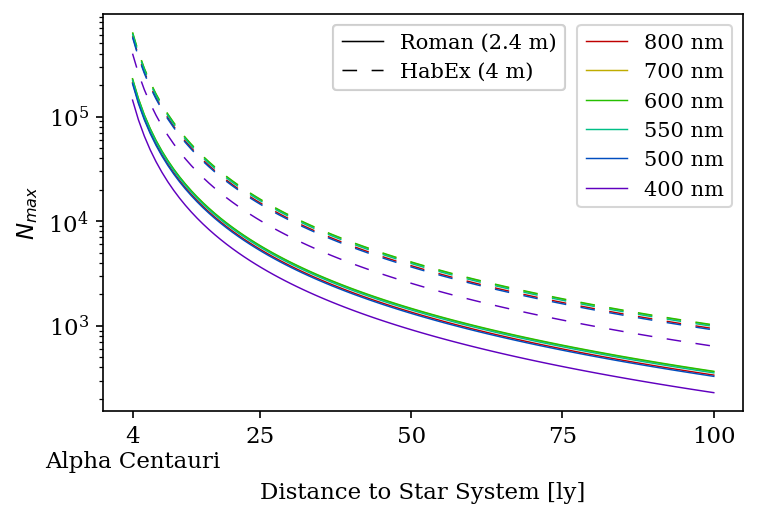

In [ ]:
fig, ax = plt.subplots(figsize = (5.5,3.5), dpi = 150)

labels = [str(wl) + ' nm' for wl in wavelengths]

colors = [colorsys.hsv_to_rgb(i, 1, 0.75) for i in np.linspace(0, 0.75, 6)]

for ap_ind, telescope in enumerate(['Nancy Grace Roman Space Telesope (2.4 m)',
                                    'HabEx (4 m)']):
    for i, wl in enumerate(wavelengths):
        if ap_ind == 1:
            plt.plot(distances, n_dots[ap_ind, i], c = colors[i],
                     linewidth = 0.7, dashes = (10,10))
        else:
            plt.plot(distances, n_dots[ap_ind, i], c = colors[i],
                     linewidth = 0.7, label = labels[i])

legend0 = plt.legend()
ax.add_artist(legend0)
plt.xlabel('Distance to Star System [ly]')
plt.ylabel('$N_{max}$')
plt.yscale('log')
# plt.xscale('log')
ax.tick_params(axis='y', which='both')
# plt.grid(which = 'major', color = [0.85,0.85,0.85])
# plt.grid(which = 'minor', color = [0.97,0.97,0.97], axis = 'y')
plt.xticks([4,25,50,75,100], ['4\nAlpha Centauri', '25', '50', '75', '100'])

custom_lines = [Line2D([0], [0], color='black', linewidth = 0.7),
                Line2D([0], [0], color='black', linewidth = 0.7, dashes = (10,10))]
labels = ['Roman (2.4 m)', 'HabEx (4 m)']
legend1 = plt.legend(custom_lines, labels, bbox_to_anchor=(0.738, 1))

ax.add_artist(legend1)

plt.show()